In [1]:
#In this notebook we will use simple two-dimensional data sets to illustrate the behavior of the support vector machine and the Perceptron, when used with quadratic and RBF kernels.
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.svm import SVC
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)

In [ ]:
#The directory containing this notebook should also contain two-dimensional data files, data1.txt through data5.txt. These files contain one data point per line, along with a label (either -1 or 1), like:

#3 8 -1 (meaning that point x=(3,8) has label y=-1)
#The next procedure, learn_and_display_SVM, loads one of these data sets, invokes sklearn.SVC to learn a classifier, and then displays the data as well as the boundary. It is invoked as follows:

#learn_and_display_SVM(datafile, kernel_type, C_value, s_value)
#where

#datafile is one of 'data1.txt' through 'data5.txt' (or another file in the same format)
#kernel_type is either 'quadratic' or 'rbf'
#C_value is the setting of the soft-margin parameter C (default: 1.0)
#s_value (for the RBF kernel) is the scaling parameter s (default: 1.0)

In [2]:
def learn_and_display_SVM(datafile, kernel_type='rbf', C_value=1.0, s_value=1.0):
    data = np.loadtxt(datafile)
    n,d = data.shape
    # Create training set x and labels y
    x = data[:,0:2]
    y = data[:,2]
    # Now train a support vector machine and identify the support vectors
    if kernel_type == 'rbf':
        clf = SVC(kernel='rbf', C=C_value, gamma=1.0/(s_value*s_value))
    if kernel_type == 'quadratic':
        clf = SVC(kernel='poly', degree=2, C=C_value, coef0=1.0)
    clf.fit(x,y)
    sv = np.zeros(n,dtype=bool)
    sv[clf.support_] = True
    notsv = np.logical_not(sv)
    # Determine the x1- and x2- limits of the plot
    x1min = min(x[:,0]) - 1
    x1max = max(x[:,0]) + 1
    x2min = min(x[:,1]) - 1
    x2max = max(x[:,1]) + 1
    plt.xlim(x1min,x1max)
    plt.ylim(x2min,x2max)
    # Plot the data points, enlarging those that are support vectors
    plt.plot(x[(y==1)*notsv,0], x[(y==1)*notsv,1], 'ro')
    plt.plot(x[(y==1)*sv,0], x[(y==1)*sv,1], 'ro', markersize=10)
    plt.plot(x[(y==-1)*notsv,0], x[(y==-1)*notsv,1], 'k^')
    plt.plot(x[(y==-1)*sv,0], x[(y==-1)*sv,1], 'k^', markersize=10)
    # Construct a grid of points and evaluate classifier at each grid points
    grid_spacing = 0.05
    xx1, xx2 = np.meshgrid(np.arange(x1min, x1max, grid_spacing), np.arange(x2min, x2max, grid_spacing))
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    Z = clf.decision_function(grid)
    # Quantize the values to -1, -0.5, 0, 0.5, 1 for display purposes
    for i in range(len(Z)):
        Z[i] = min(Z[i],1.0)
        Z[i] = max(Z[i],-1.0)
        if (Z[i] > 0.0) and (Z[i] < 1.0):
            Z[i] = 0.5
        if (Z[i] < 0.0) and (Z[i] > -1.0):
            Z[i] = -0.5
    # Show boundary and margin using a color plot
    Z = Z.reshape(xx1.shape)
    plt.pcolormesh(xx1, xx2, Z, cmap=plt.cm.PRGn, vmin=-2, vmax=2)
    plt.show()

C:\Users\josep\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


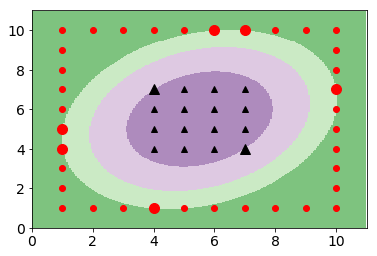

In [3]:
#Experiments with the quadratic kernel
learn_and_display_SVM('data1.txt', 'quadratic', 1.0)

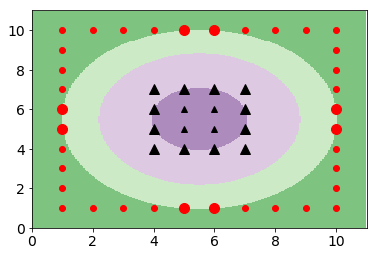

In [4]:
#Also try data2.txt through data5.txt. Also try changing the value of C (the third parameter) to see how that affects the boundary and margin.
# Experiments with the RBF kernel
#Now experiment with the RBF kernel, on the same five data sets. This time there are two parameters to play with: C and sigma
learn_and_display_SVM('data1.txt', 'rbf', 10.0, 10.0)

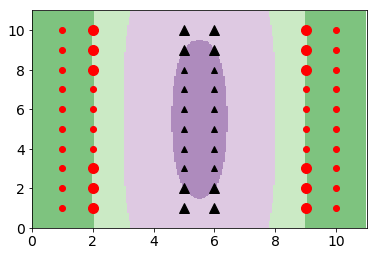

In [17]:
learn_and_display_SVM('data5.txt', 'rbf', 10.0, 10.0)

C:\Users\josep\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


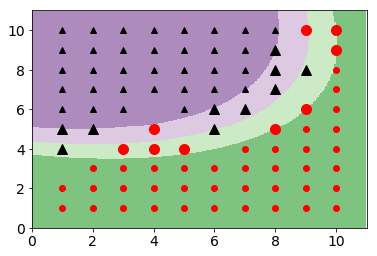

In [20]:
learn_and_display_SVM('data3.txt', 'quadratic', 1.0)

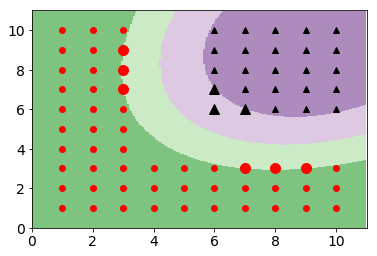

In [41]:

learn_and_display_SVM('data4.txt', 'rbf', 10.0, 10.0)

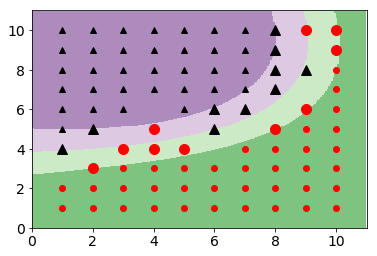

In [42]:
learn_and_display_SVM('data3.txt', 'rbf', 10.0, 10.0)

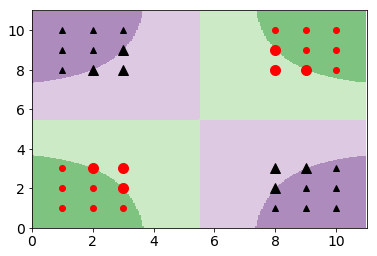

In [43]:
learn_and_display_SVM('data2.txt', 'rbf', 10.0, 10.0)